# Visualização e Bancos de dados com Python - Aula 2

Olá, cientistas de dados! Em nossa última aula aprendemos a plotar gráficos a partir de um código Python, utilizando o Google Colab como ferramenta. Aprendemos sobre os diversos tipos de gráficos e quando devemos utilizar cada tipo.

Para o processo de plotagem dos gráficos, conhecemos duas grandes bibliotecas do ecossistema Python: **seaborn** e **matplotlib**. Utilizamos estas bibliotecas de maneira muito simples, e o resultado foram gráficos com um visual muito básico, que por vezes, pode não atender as nossas expectativas de visual.

## Iniciando o aprendizado de hoje...

Vamos preparar nosso ambiente: vamos carregar nossos datasets, importar as bibliotecas e aprender!!!!!!!!

## Recapitulando

Para ilustrar o problema que vamos endereçar, imaginem a seguinte situação: Você é um cientista de dados encarregado de fazer uma análise em cima dos dados da população mundial. Os seus gráficos serão incorporados em uma apresentação PowerPoint.

Você não perde tempo e criar o seu notebook no Google Colab com os gráficos!

### Preparando o ambiente

#### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns

#### Inicializando variáveis

In [2]:
nome_arquivo = "content/datasets/worldpop/world_population.csv"
download_datasets = False

#### Carregando datasets

In [3]:
if download_datasets:
  !git lfs clone -l -s https://github.com/labeduc/datasets.git

### Carregando dados

In [4]:
wpop = pd.read_csv(nome_arquivo)

Você pode verificar o que foi carregado no DataFrame **wpop** utilizando o comando **head()** e o comando **info()**.

In [5]:
wpop.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
wpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

### Começando a plotar gráficos

Aqui, vamos fazer um gráfico bem rápido por País (Country) e população ao longo dos anos. Na verdade, existe uma coluna no DataFrame para cada ano (1970 Population, 1980 Population, ...). Para facilitar, vamos listar apenas os países do BRICS (bloco econômico formado por Brasil, Russia, India, China e África do Sul) mais os Estados Unidos.

In [7]:
# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

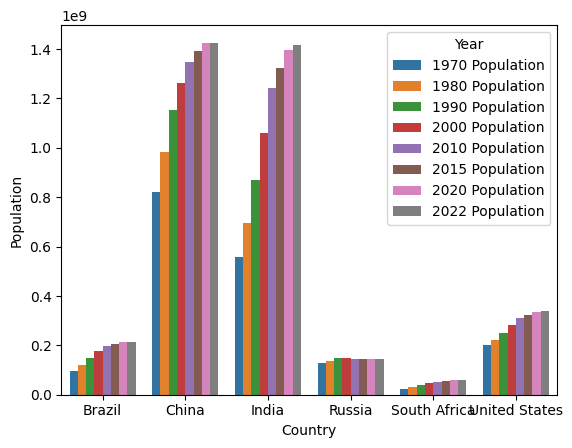

In [8]:
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

Essa foi fácil, não??? Gráfico prontinho para usar, quase nada de esforço... Agora, deixa eu gerar o arquivo e enviar pro pessoal que está criando a apresentação!

## Aqui Começa o Verdadeiro Trabalho

Ahá, pensou que era tudo mamão com açúcar, cientista de dados? Não, é aqui que sua *via crucis* começa... O pessoal da apresentação te envia um e-mail, reportando os seguintes problemas:
- A imagem está com uma qualidade ruim
- O gráfico não tem um título
- As cores não seguem a identidade visual da empresa
- Existem rótulos (labels) se sobrepondo no eixo X
- O que é aquele 1e9 lá no topo do gráfico???
- A legenda está ocupando muito espaço
- Não está claro o valor que cada barra representa

Como você deve ter percebido, essa criação de um gráfico vai bem mais além do que apenas plotar o gráfico em si... Este gráfico geralmente estará inserido dentro de um contexto maior: pode ser parte de um dashboard, de um documento, de uma apresentação. O gráfico, como uma peça visual, deve se adequar a outros elementos de comunicação, utilizando as cores, fontes e formatos que são utilizados. Sobretudo, devemos fazer com que nossos gráficos direcionem o foco da nossa audiência para a informação que queremos destacar, seja ela uma ação a ser tomada, um insight a ser percebido, ou até mesmo uma demonstração de um fato.

Por isso, vamos aprender a endereçar estas questões de aparência e estilo em nossos gráficos, para criar versões melhoradas dos mesmos.

### Melhorando nosso gráfico

Neste notebook iremos aprender a fazer a customização através de dois meios: fazendo a configuração a partir do MatPlotLib e utilizando funções de estilização do seaborn.

Se vocês lembram da aula anterior, o MatPlotLib é a biblioteca que está por trás de praticamente toda as outras bibliotecas de visualização em Python. Portanto, boa parte da configuração e customização nestas bibliotecas é feita através do MatPlotLib. A biblioteca seaborn não é exceção. Portanto, faremos toda a nossa customização via MatPlotLib, salvo em casos que a Seaborn tenha uma maneira mais fácil de resolver a questão.

O MatPlotLib, através do objeto **pyplot**, tem um dicionário de configurações que pode ser utilizado para muitos tipos de configuração. Veja um exemplo abaixo:
```python
plt.rcParams["legend.fontsize"] = "x-small"
```

Aconselho vocês a ler a seguinte página da documentação do MatPlotLib: [rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html?highlight=rcparams#matplotlib.rcParams), para aprender mais sobre as configurações.


#### **Passo 1** - Ajustando o Tamanho da Imagem

O nosso gráfico original tem um bom tamanho, mas podemos perceber que alguns dos valores do eixo X estão sobrescrevendo uns aos outros.
Utilizando a configuração via MatPlotLib, podemos modificar isso facilmente. Para facilitar a visualização da solução, iremos repetir todo o código a cada passo do processo. Também é importante que vocês leiam os comentários, porque eles conterão informações relevantes para o aprendizado.

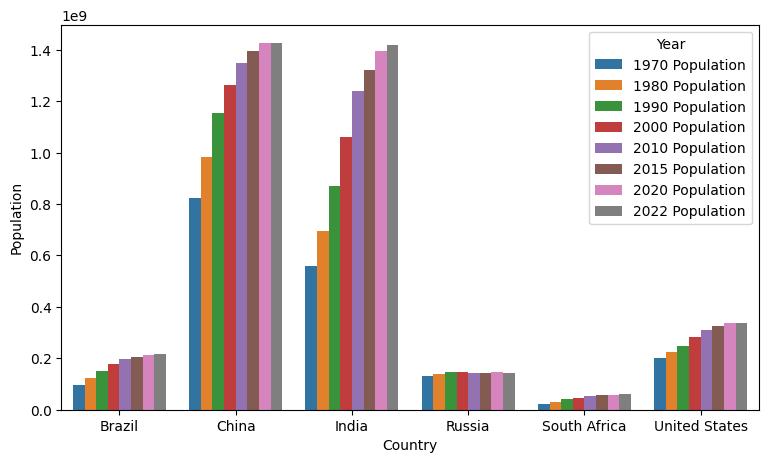

In [9]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
# subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)

sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

Assim ficou melhor, não é mesmo? Agora vamos mexer no tipo de imagem que o seaborn gera.

#### **Passo 2** - Ajustando a Qualidade da Imagem

A próxima coisa a ser feita é melhorar a qualidade da imagem send gerada. Aqui, temos duas coisas que podem ser feitas: 
- Aumentar o DPI da imagem, que tem como default 100dpi. Geralmente, para apresentações e artigos, o ideal é 300
- Modificar o formato de salvamento da imagem para SVG. Assim, quando for exportada através do comando **plt.savefig()**, gerará um arquivo vetorizado.


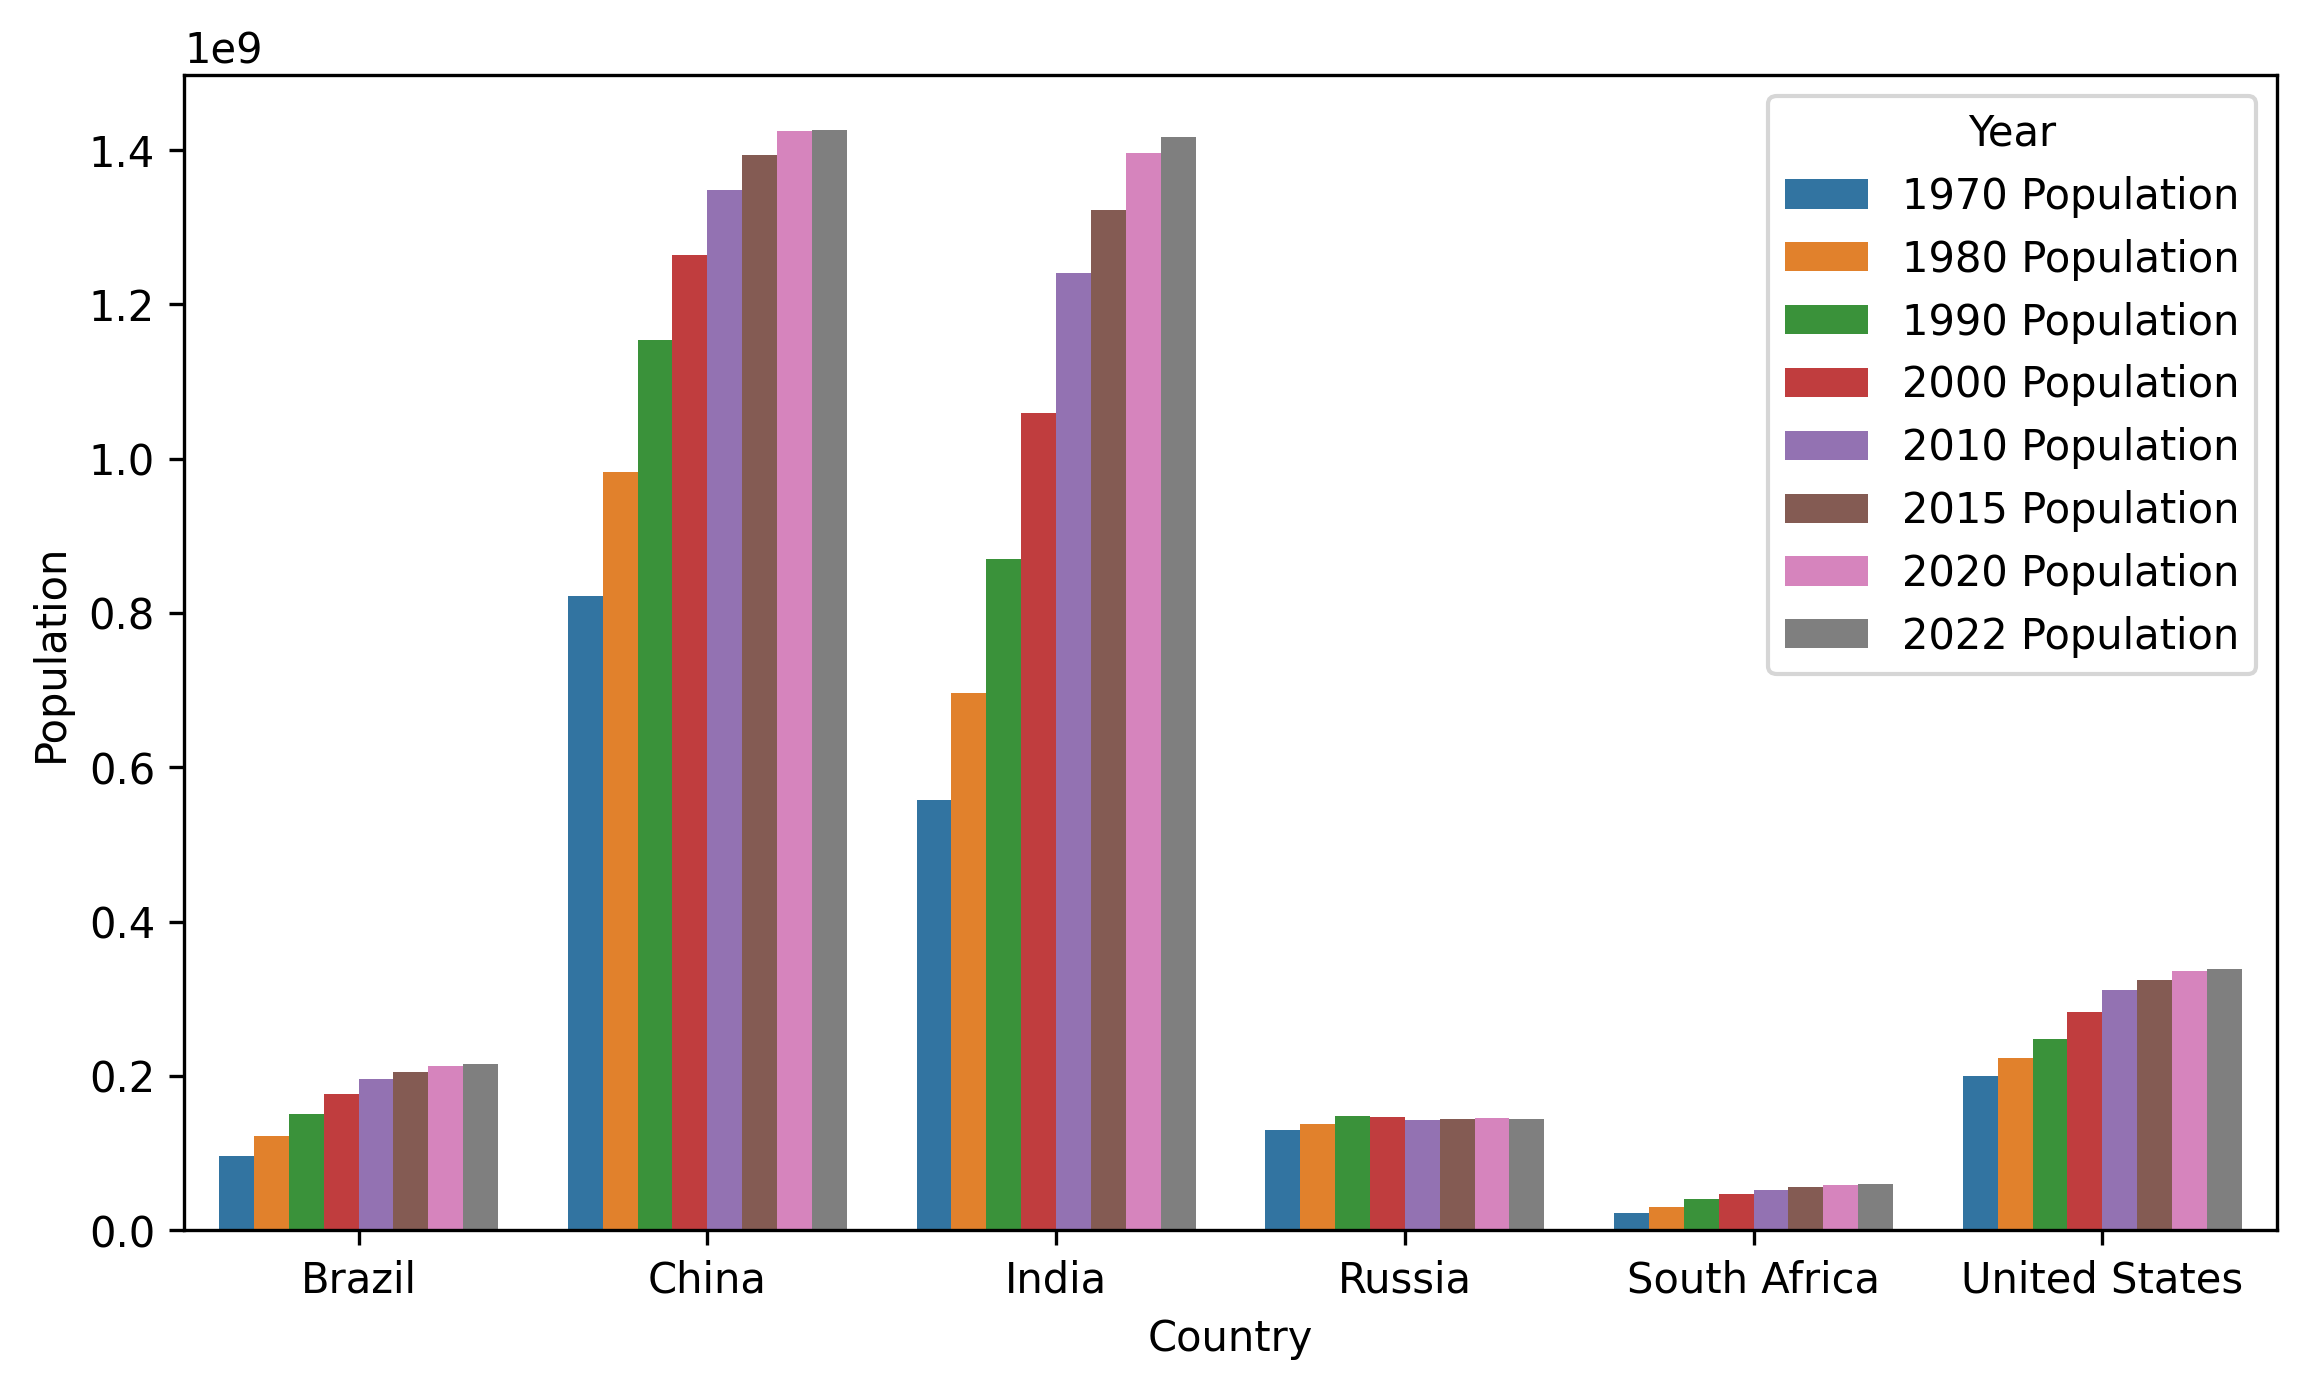

In [10]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
# subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

plt.savefig("test.svg")

E cumprimos com mais um passo da nossa customização. Agora, ao rodar o comando **plt.savefig()**, o mesmo gera um arquivo SVG, que é vetorizado e portanto, nunca perde a resolução. Também, ao aumentarmos o número de DPIs, melhoramos a imagem gerada.

#### **Passo 3** - Removendo o "Ruído" do Gráfico

De acordo com as boas práticas na área de visualização, uma boa visualização é limpa, ou seja, não possui elementos que não estejam relacionados aos dados. No gráfico acima, o box em torno do gráfico, a legenda com muito texto, aquela informação 1e9 perdida no gráfico são ruídos, que tiram a atenção das barras que são os dados.

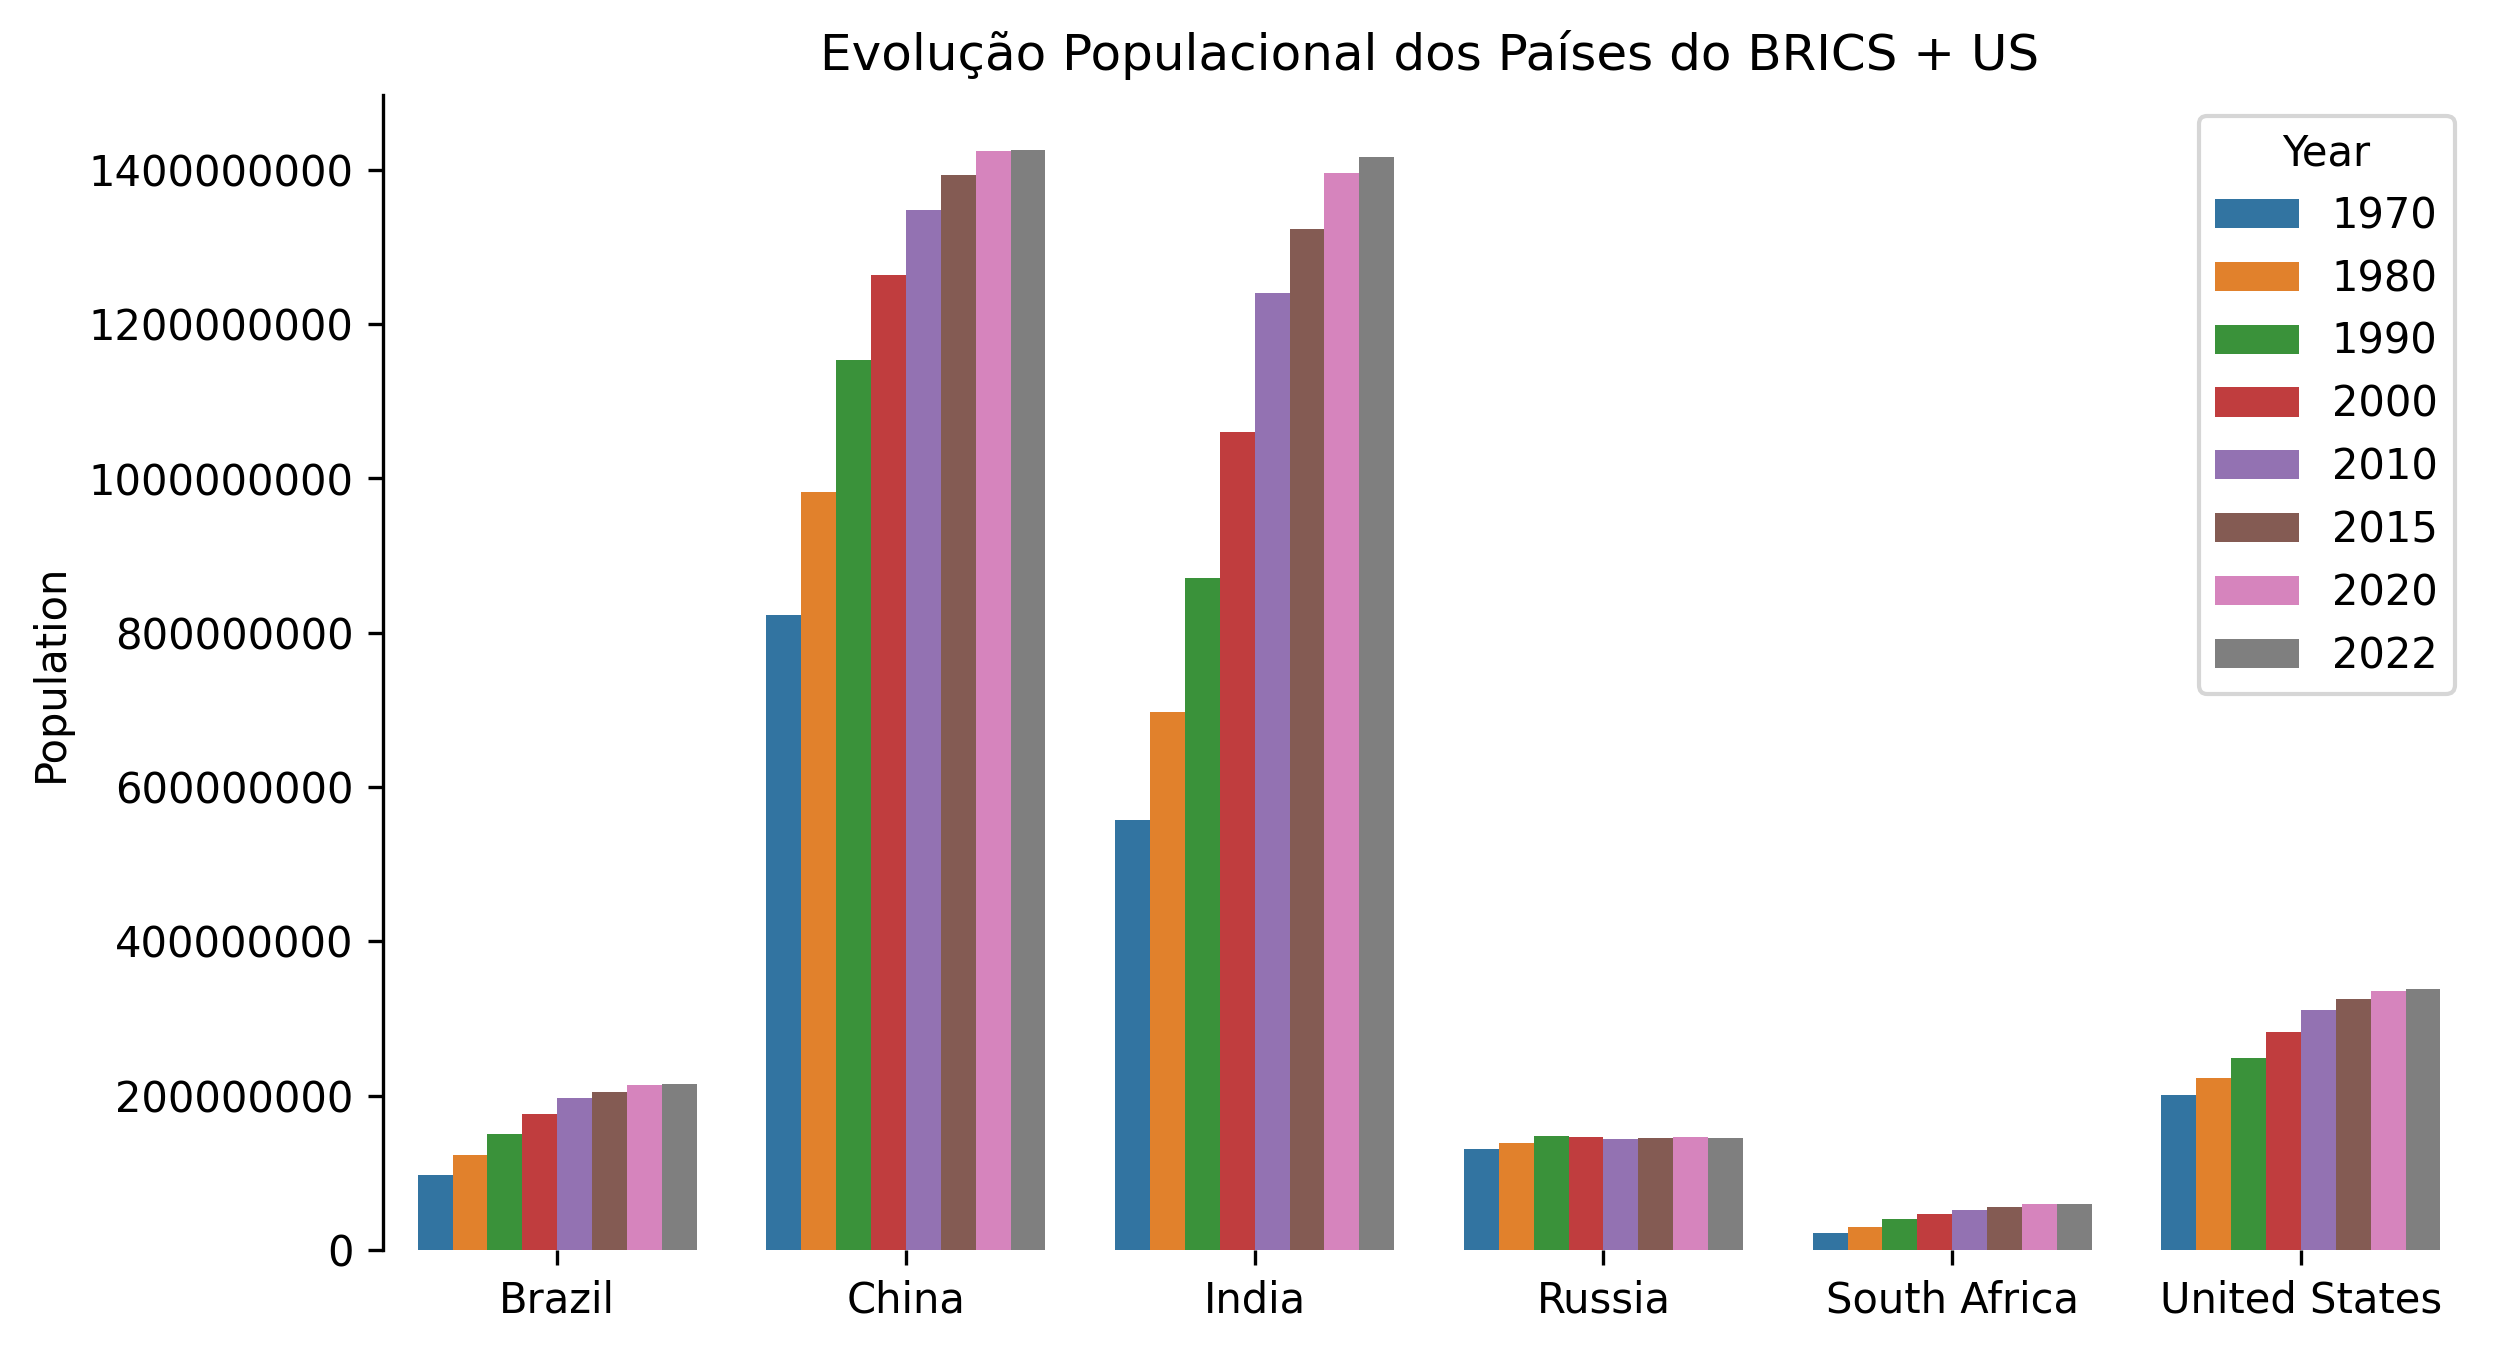

In [11]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.ticklabel_format(style="plain", useLocale=True)

# Gero o objeto do gráfico
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

# Para adicionar o título do gráfico, uso o set_title() do objeto gerado.
sx.set_title('Evolução Populacional dos Países do BRICS + US')

# Posso remover também o título do eixo X, já que é óbvio que estamos listando países.
sx.set_xlabel('');



Olha só, conseguimos fazer quase tudo, mas o nosso eixo vertical ficou bem ruim, não é mesmo? Precisamos agora, formatar os valores e, em vez de usar um eixo, colocar os valores nas próprias barras.

C:\Users\walter_ritzel\AppData\Local\Temp\ipykernel_21624\1547891110.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


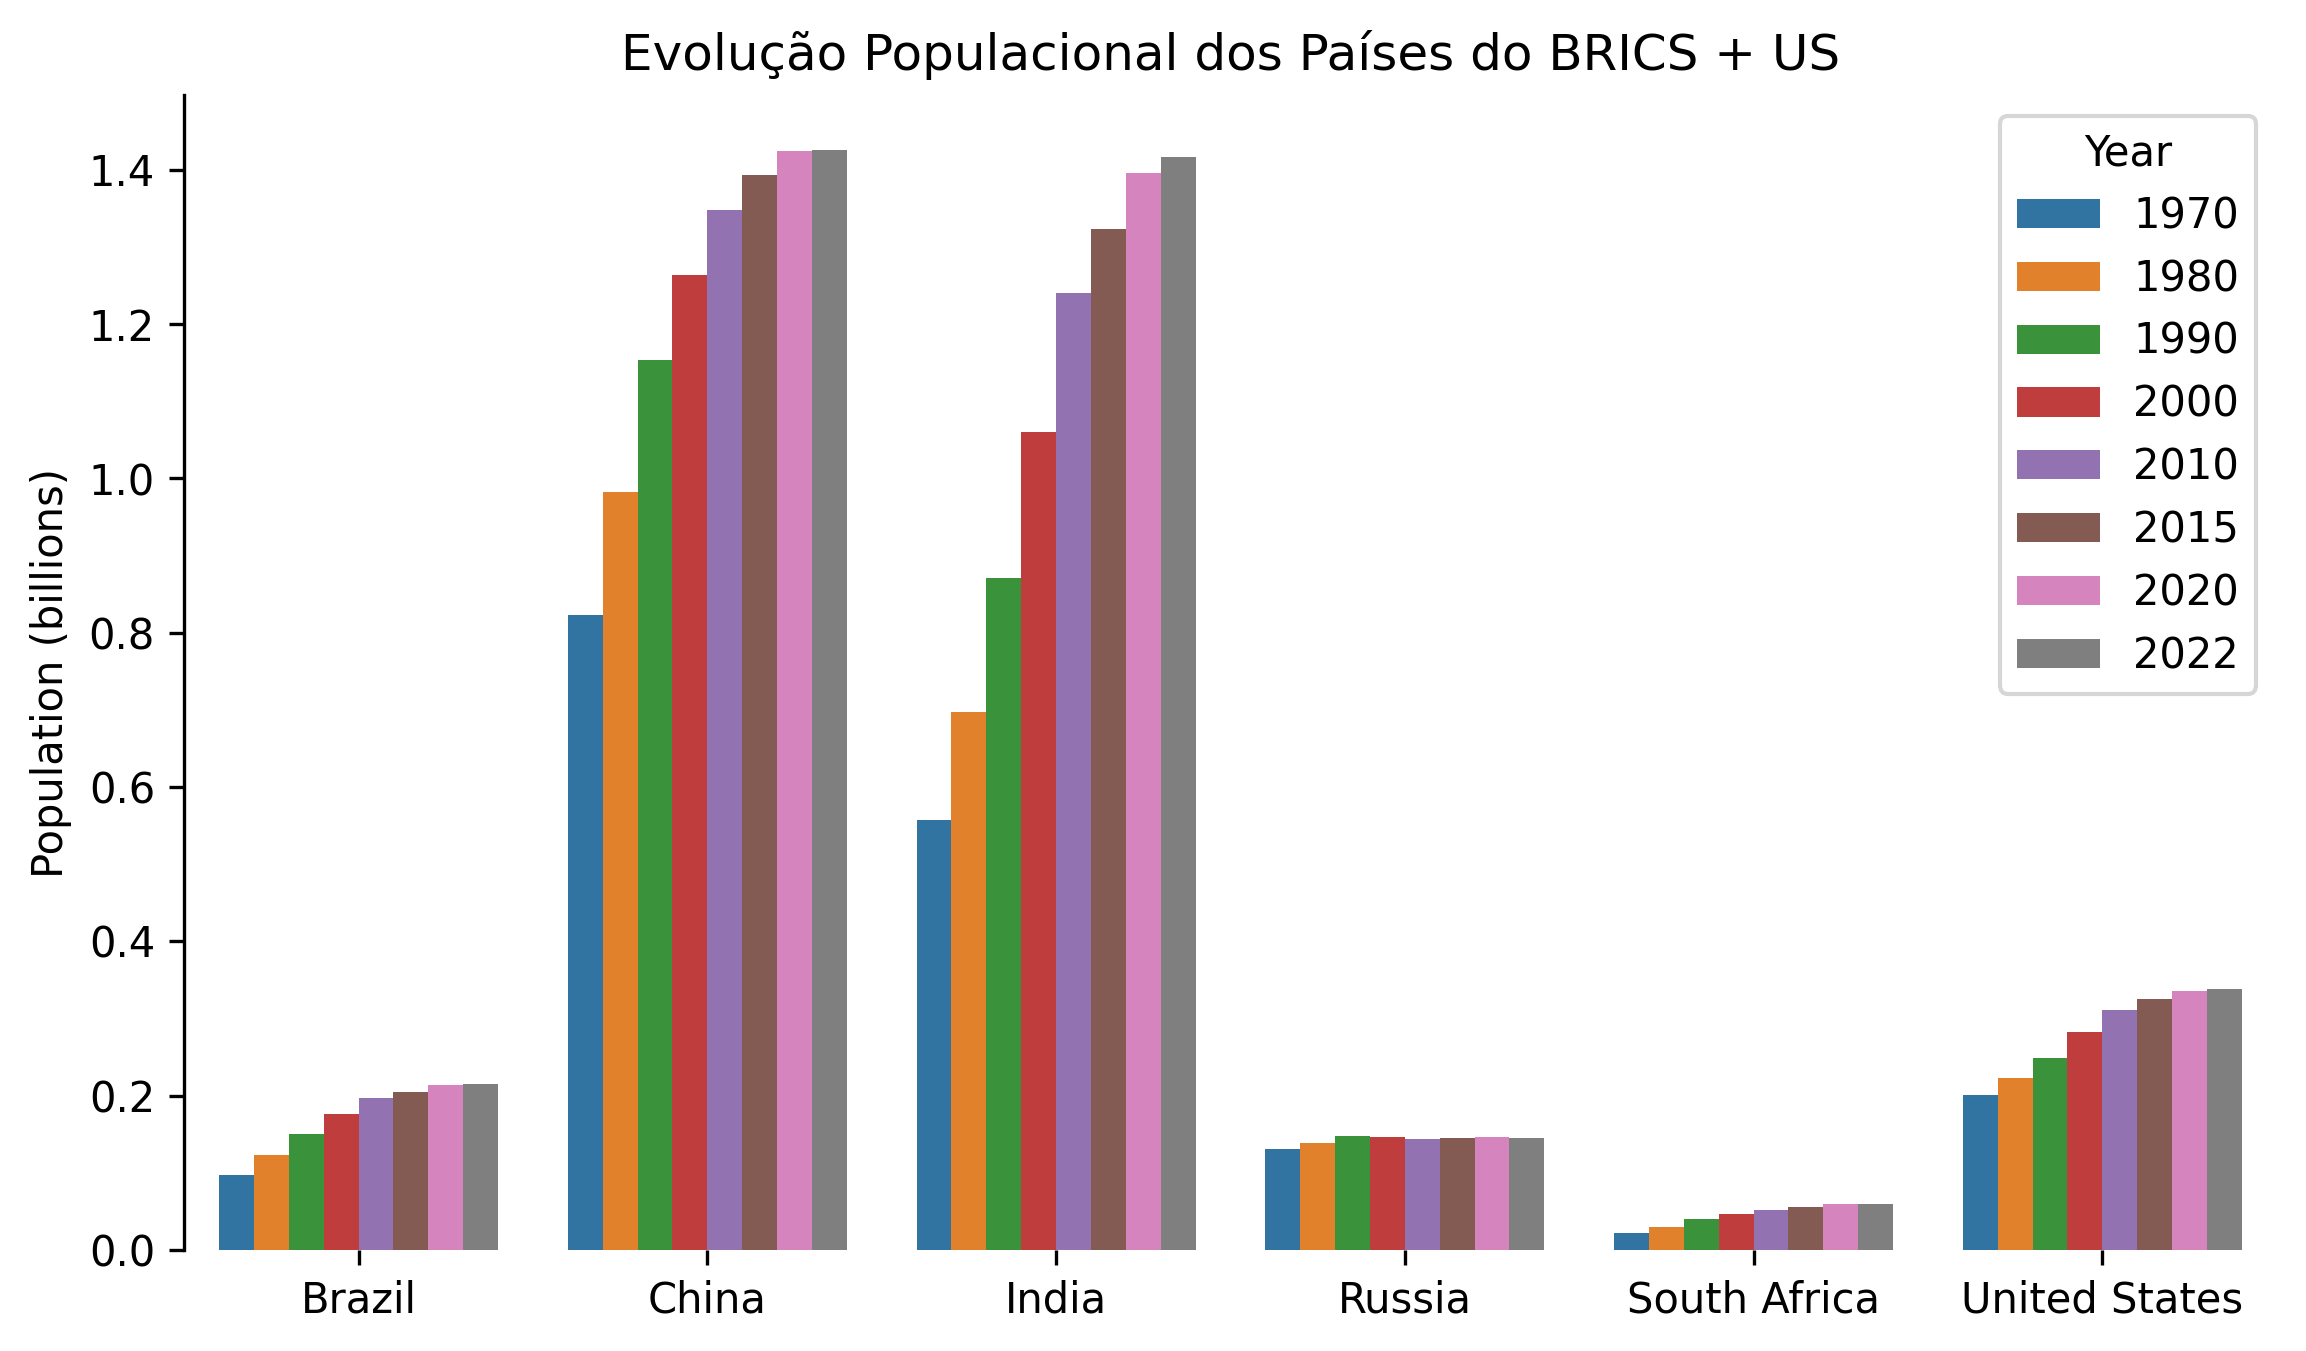

In [12]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

# Gero o objeto do gráfico
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

# Para adicionar o título do gráfico, uso o set_title() do objeto gerado.
sx.set_title('Evolução Populacional dos Países do BRICS + US')

# Posso remover também o título do eixo X, já que é óbvio que estamos listando países.
sx.set_xlabel('');

# Como parte da formatação, vamos mencionar no label do eixo qual a ordem dele
sx.set_ylabel('Population (billions)');

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

Opa, estamos quase lá! Já temos uma formatação melhor no eixo, agora precisamos sumir com o eixo e passar os valores para as próprias barras.

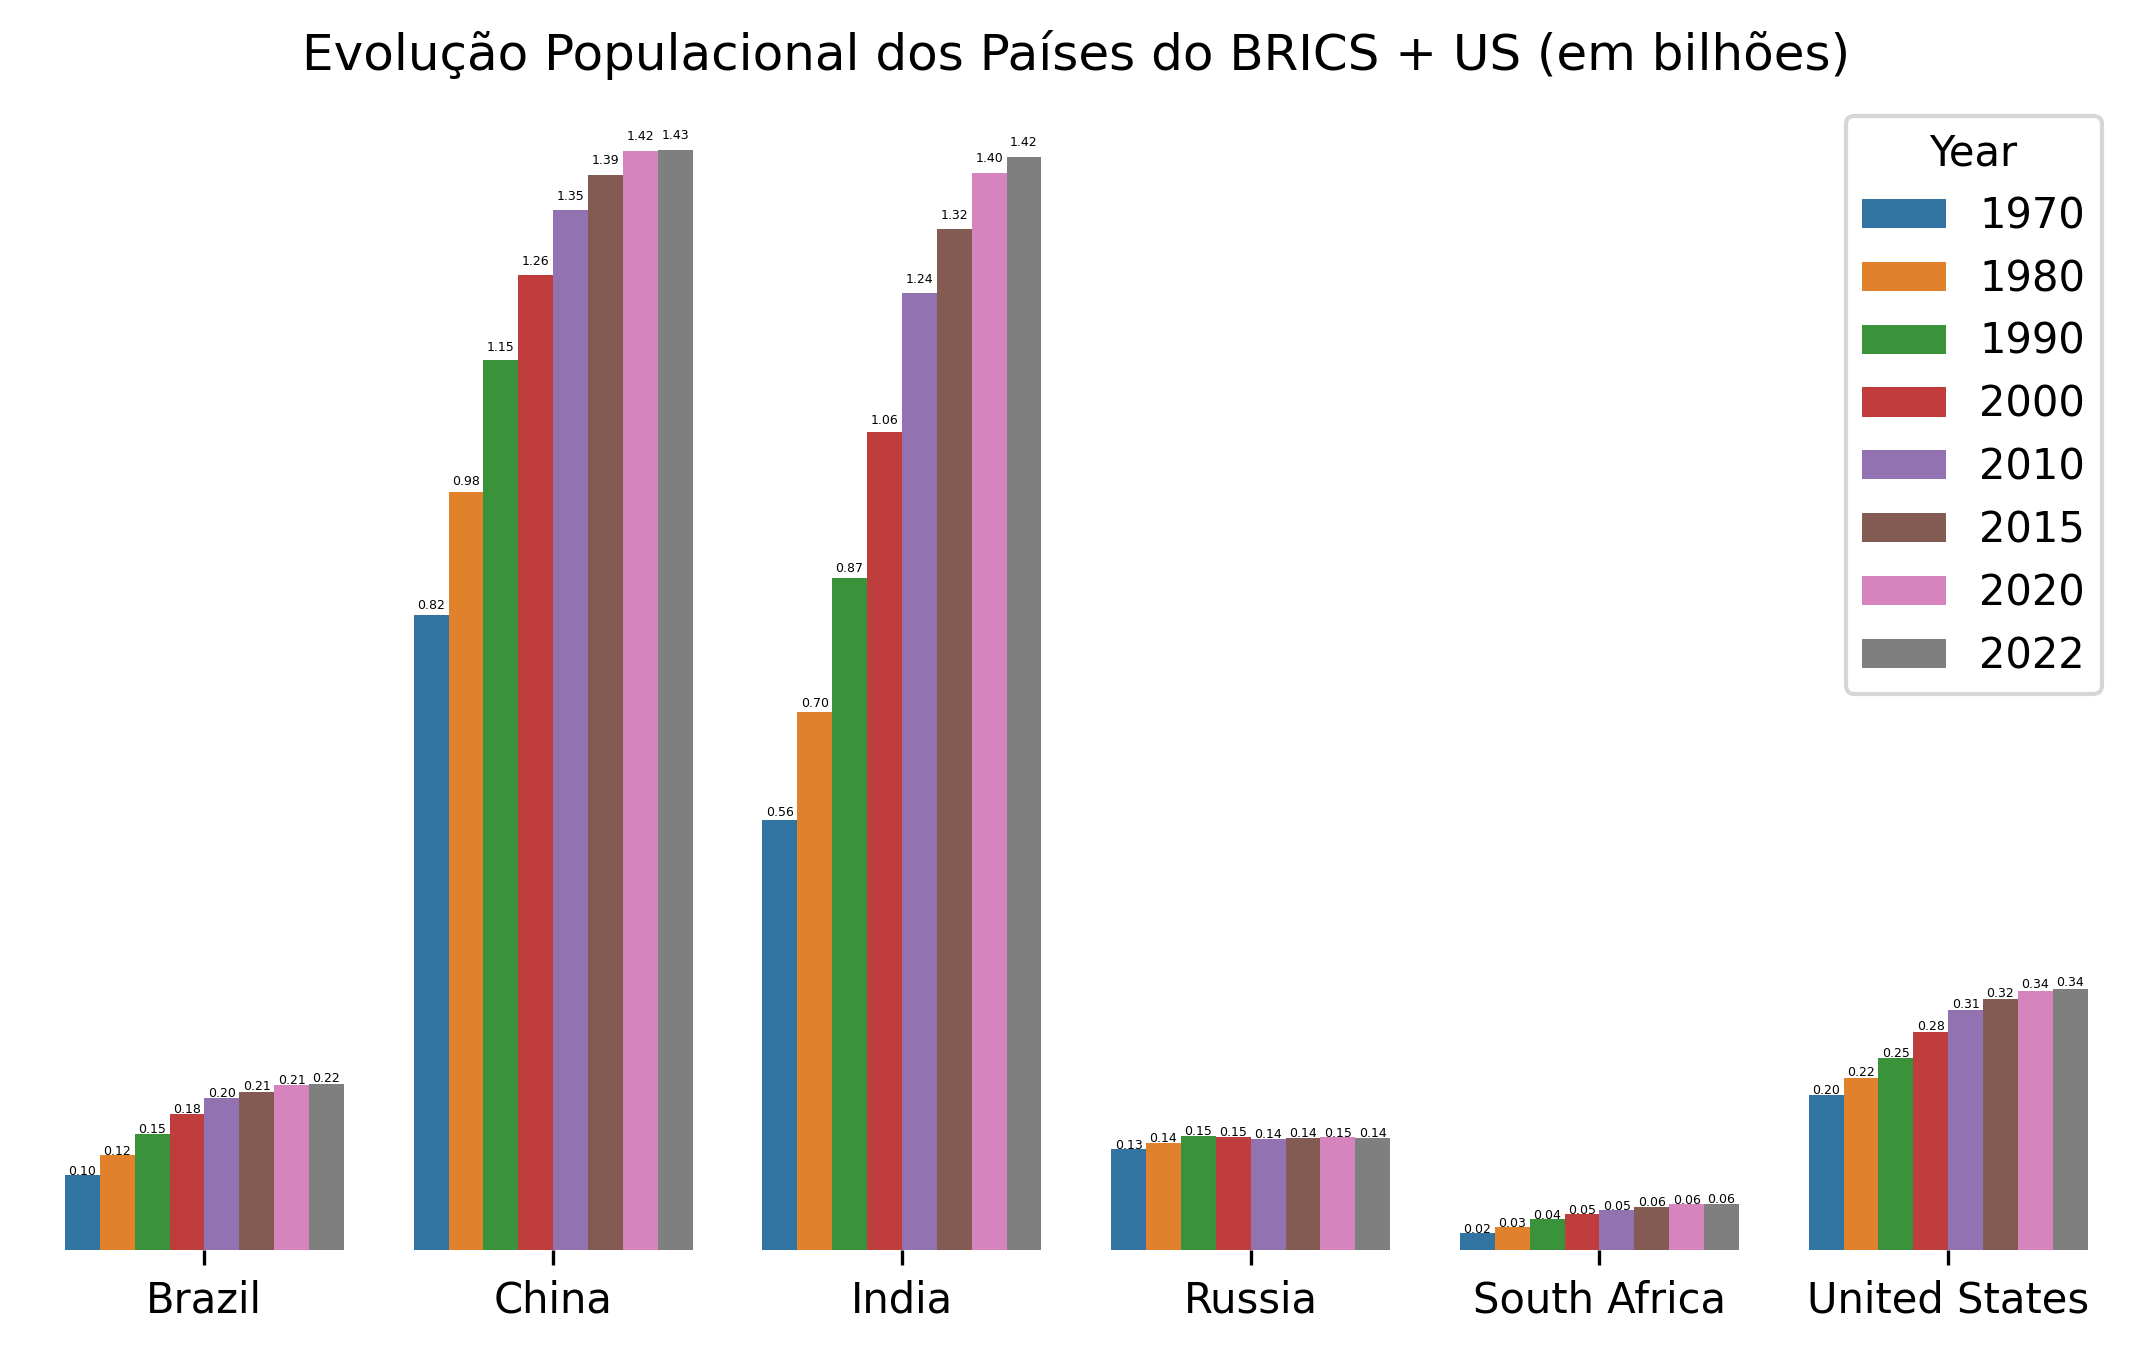

In [13]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# Gero o objeto do gráfico
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

# Para adicionar o título do gráfico, uso o set_title() do objeto gerado.
sx.set_title('Evolução Populacional dos Países do BRICS + US (em bilhões)')

# Removendo os titulos dos eixos.
sx.set_xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

E finalmente, conseguimos!!! Eliminanos as grandes fontes de "ruído" do nosso gráfico! Mas ainda não acabamos...

#### **Passo 4** - Focando no que interessa... dados

Agora que os principais ruídos foram removidos, e o que sobrou tem relevância para o que desejamos que o nosso público alvo veja, precisamos fazer ajustes para que o foco do público fique exatamente onde queremos. 

Para atingir este objetivo, iremos fazer 3 coisas:
- Reduzir a legenda, para que fique em menos evidência
- Iremos reduzir a fonte utilizada em geral no gráfico, e ver se é possível aumentar as barras.
- Trabalhar as cores - vamos utilizar as cores para destacar os últimos resultados, e colocar resultados anteriores em menor destaque

Vamos lá?

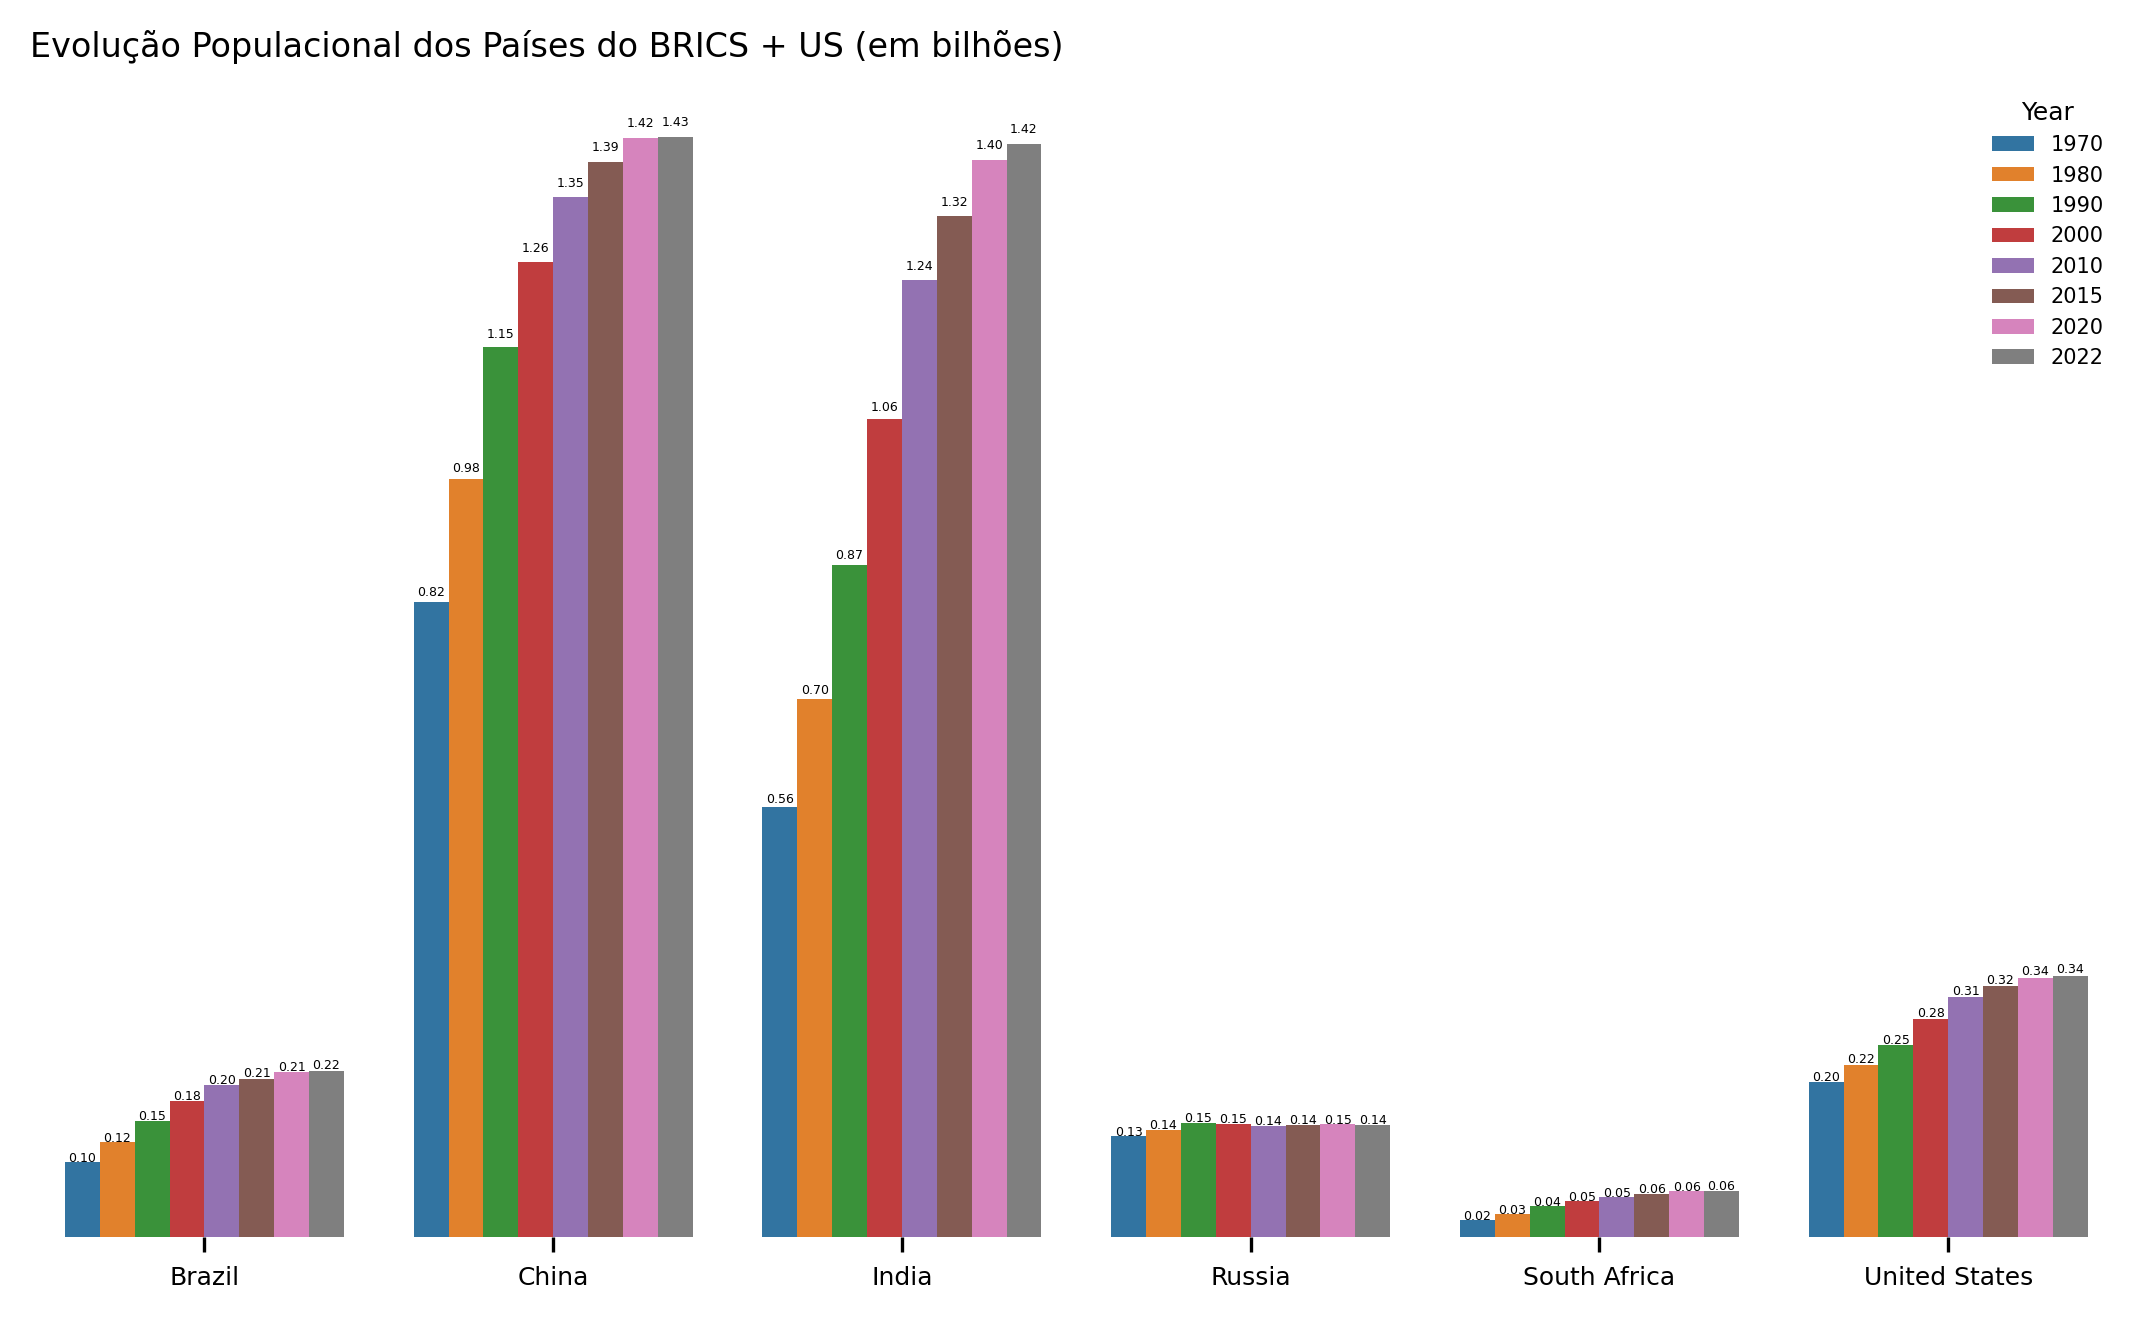

In [14]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

# Para adicionar o título do gráfico, uso o title() do objeto gerado.
plt.xlabel('')
plt.title('Evolução Populacional dos Países do BRICS + US (em bilhões)', fontsize=8, loc="left")
plt.tick_params(axis='both', which='major', labelsize=6)

# Gero o objeto do gráfico
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

# Removendo os titulos dos eixos.
sx.set_xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

Pronto, reduzimos a legenda, movemos o título para a esquerda. Vamos definir nossa paleta de cores e modificar o gráfico? Para isso, precisamos de uma lista de cores em formato hexadecimal. Vamos lá!

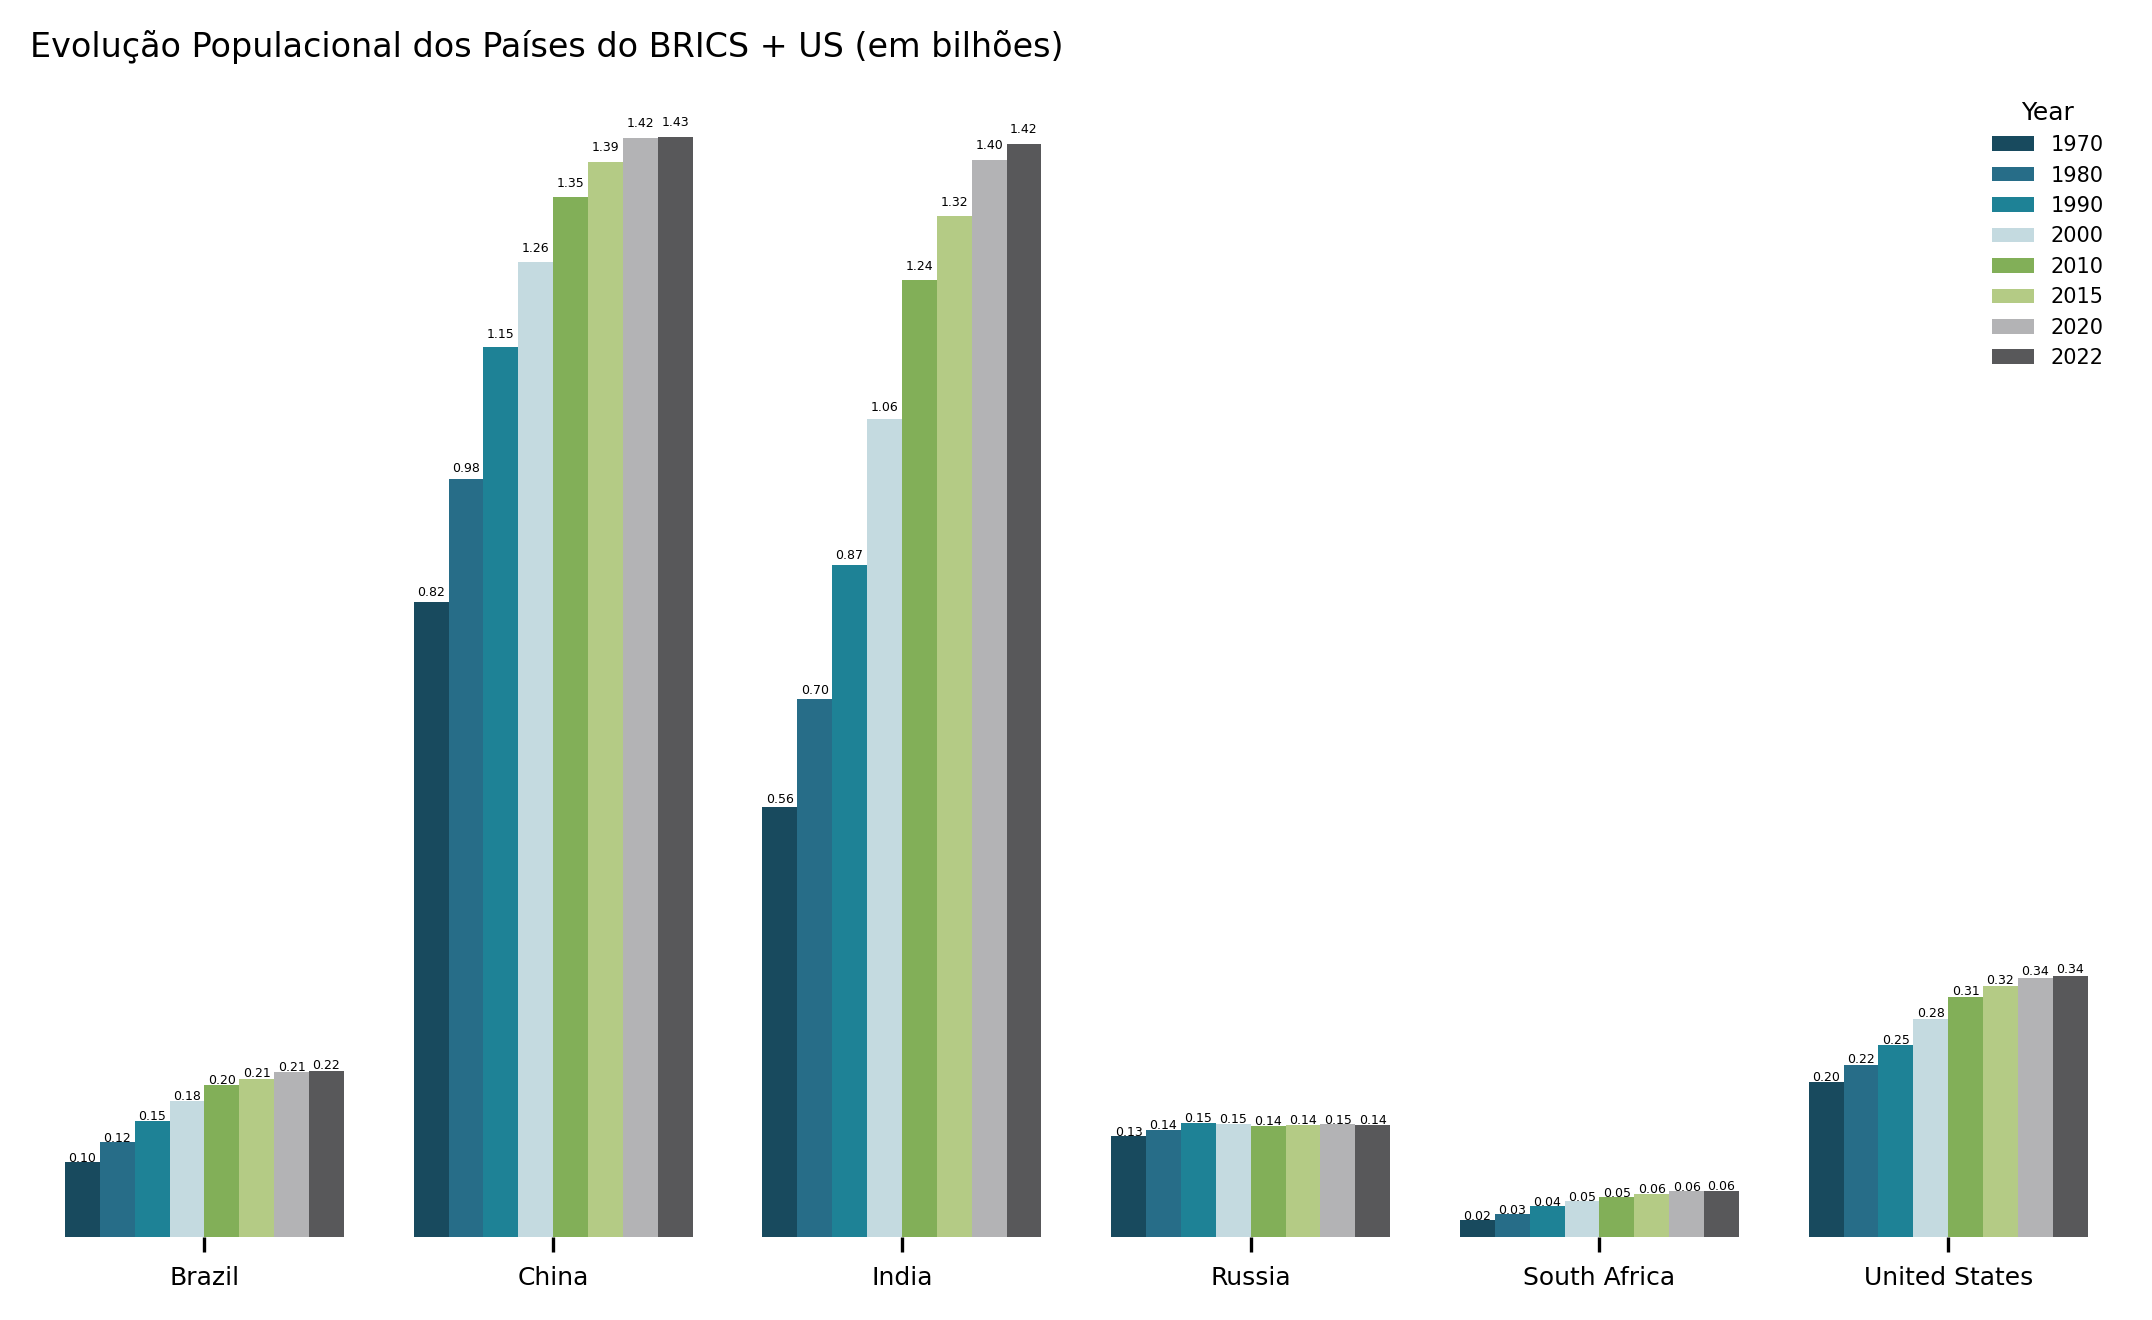

In [15]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

#Definindo a paleta de cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a", "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091", "#e26c54", "#b0391e"]
sns.set_palette(sns.color_palette(cores))

# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
subset = wpop[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
subset = subset.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"})

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_data = subset.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_data = prep_data[prep_data["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

# Para adicionar o título do gráfico, uso o title() do objeto gerado.
plt.xlabel('')
plt.title('Evolução Populacional dos Países do BRICS + US (em bilhões)', fontsize=8, loc="left")
plt.tick_params(axis='both', which='major', labelsize=6)

# Gero o objeto do gráfico
sx = sns.barplot(x=prep_data["Country"], y=prep_data["Population"], hue=prep_data["Year"])

# Removendo os titulos dos eixos.
sx.set_xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

Bom, já temos uma paleta de cores melhor que a original. Agora, precisamos utilizar a cor de maneira mais inteligente. Por exemplo, seria interessante utilizar cores que indicassem faixas de crescimento? se em determinando ano o país cresceu mais ou menos de 10% sobre o ano anterior. Isso nos gera um problema: a função **barplot()** do seaborn nos permite determinar valores para o eixo X, eixo Y e criar subcategorias com o parâmetro hue, que também associa cores. Para podermos diferenciar as categorias das cores, teremos que usar outra função, a **catplot()**. O visual vai modificar um pouco, talvez tenhamos que rever algumas customizações que fizemos. Mas vamos lá!!!

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

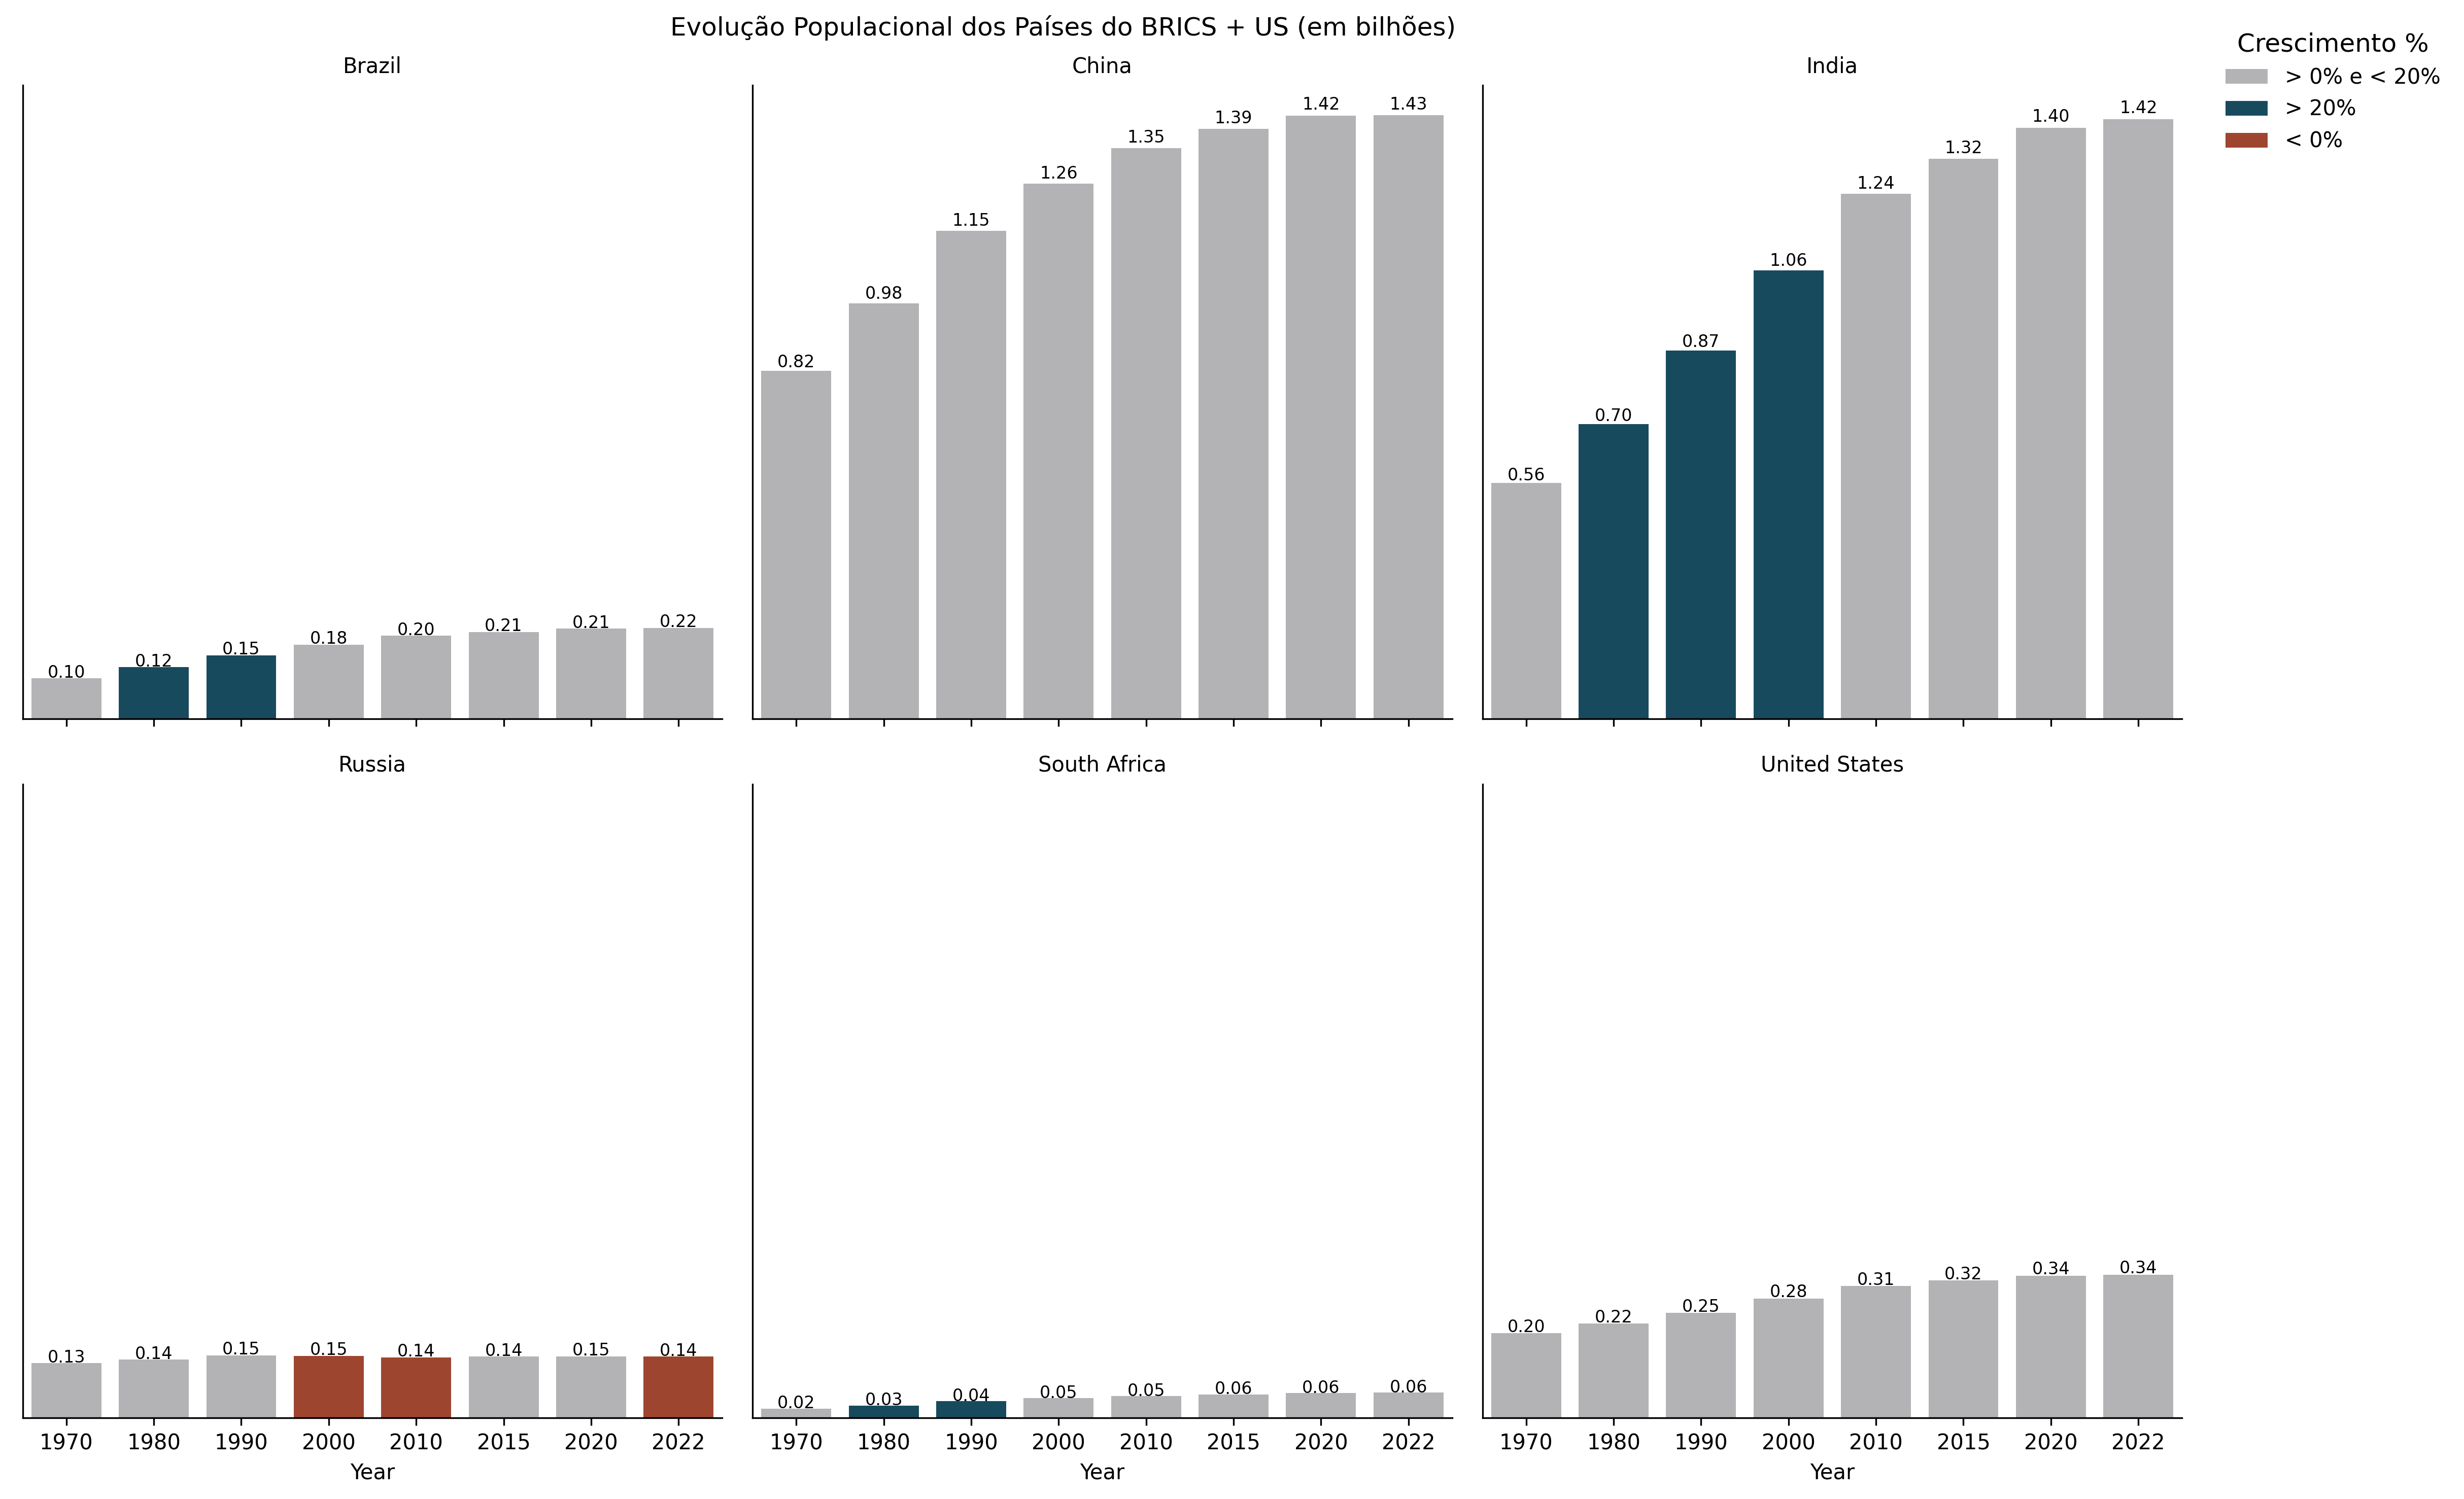

In [16]:
import pandas as pd

# Este é o objeto que irá nos permitir modificar algumas 
# das configurações do nosso gráfico
import matplotlib.pyplot as plt 

import seaborn as sns

# Em primeiro lugar, ordenamos por país e ano
ordered_data = prep_data.sort_values(["Country", "Year"], ascending=[True, True])

#Geramos a lista de países baseado nos dados
paises = ordered_data["Country"].unique().tolist()

# Agora calculamos a diferença entre a população do ano atual e o ano anterior e expressa-la em percentual.
# 1 - Percorremos a lista de paises
diferencas = []
for pais in paises:
  # Separamos as linhas do dataframe daquele país
  country_data = ordered_data.query(f"Country == '{pais}'")
  # Geramos uma série com as diferenças
  diffs = country_data['Population'].rolling(window=2).apply(lambda x: ((x.iloc[1] - x.iloc[0])/x.iloc[0])*100)
  # adicionamos em uma lista
  diferencas.append(diffs)

# 2- Ao termino dos calculos, adicionamos a nova coluna no dataframe
ordered_data['Difference'] = pd.concat(diferencas)
# 3 - Por último, criamos uma categoria baseada no Percentual, que iremos utilizar para colorir as barras
cores_barras = ordered_data['Difference'].apply(lambda x: "> 20%" if x > 20 else "< 0%" if x < 0 else "> 0% e < 20%")
ordered_data["Crescimento Sobre Ano Anterior"] = cores_barras

# Aqui iremos modificar o tamanho da nossa imagem
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False



# Gero o objeto do gráfico
sx = sns.catplot(data=ordered_data, x="Year", y="Population", col="Country", hue="Crescimento Sobre Ano Anterior", kind="bar", col_wrap=3, palette={"> 20%": "#0c4f6a", "> 0% e < 20%": "#b2b3b6", "< 0%": "#b0391e" }, dodge=False, legend=False)

# Aqui começam as diferenças. A maior parte das customizações que fizemos até agora não funcionam
# porque na verdade, aqui temos não apenas 1, mas uma sequência de Gráficos
# Então, um novo conjunto de objetos precisam ser utilizados
# A primeira configuração acerta o título de cada gráfico para o seu respectivo país
sx.set_titles(template="{col_name}")
# A segunda linha adiciona o título geral do gráfico
sx.figure.suptitle('Evolução Populacional dos Países do BRICS + US (em bilhões)', fontsize=12)
# Esta linha reposiciona os elementos, para evitar sobreppsição
sx.figure.tight_layout()

# A legenda precisa ser reposicionada a nível global e toda a customização é feita agora via esta função
plt.legend(bbox_to_anchor=(1.05, 2.2), loc='upper left', borderaxespad=0, title="Crescimento %", fontsize=10, title_fontsize=12);

# Aqui precisamos percorrer cada subgráfico através do iterador axes
# Daí podemos mexer em cada gráfico individualmente, removendo
# 1 - Seus eixos Y
# 2 - Escrevendo os valores em cada barra
for axis in sx.axes:
  axis.get_yaxis().set_visible(False);
  # Esse código já foi utilizado, apenas adequamos 
  # a estrutura de objetos que temos nesta situação
  for p in axis.patches:
    _x = (p.get_x() + p.get_width() / 2)
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.2f}'.format(p.get_height()/1000000000)
    axis.text(_x, _y, value, ha="center", size=8);


Então, parece que conseguimos!!! Temos um belo gráfico para enviar para o nosso pessoal de negócios, mais limpo, com uma melhor utilização de cores, com uma boa resolução. Agora, acabamos, certo??? CERTO????

### CERTO!!!

Conseguimos escrever todo o código para plotar um gráfico, com todas as suas customizações, e de maneira bem estruturada.

É importante entender que boa parte das configurações que fizemos são ditas globais, ou seja, uma vez alteradas, valem para todos os gráficos do seu notebook. Outras dependem do gráfico que foi plotado, e portanto devem ser aplicadas a cada gráfico plotado. Entender esta diferença pode ajudar a estruturar seu código.

Para ajuda-los, temos um link interessante: um notebook individual com a nossa última solução estruturada de acordo com as boas práticas para criar notebooks. Não é a verdade absoluta, vocês podem fazer como quiser, mas é o resultado da nossa experiência para compartilhar com vocês: [aqui]()

 ## Encerrando esta aula

Espero que todos tenham aproveitado esta aula e que tenham aprendido bastante. Vamos deixar aqui alguns links que podem complementar os seus estudos e prepara-los para sua futura profissão!

Alguns destes links estarão escritos na lingua inglesa, mas você pode ativar a tradução automática no seu Google Chrome!!!

- Documentação Oficial
  - [Pandas](https://pandas.pydata.org/docs/)
  - [Seaborn](https://seaborn.pydata.org/)
  - [MatPlotLib](https://matplotlib.org/stable/index.html)  